In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

py.init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [ ]:
heptitas = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data', header=None, na_values=["?"])

In [ ]:
features = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/costs/hepatitis.expense', sep = '\t', header=None)
features = features.iloc[:,0]

features = features.str.replace(':', '')
features = features.tolist()
features.insert(0, 'class')

heptitas.columns = features

In [ ]:
n = heptitas.shape[0]
percent_missing = np.isnan(heptitas).sum()/n 
percent_missing
heptitas = heptitas.dropna()

In [5]:
df_die = heptitas.loc[heptitas["class"] == 1]['age'].values.tolist()
df_survive = heptitas.loc[heptitas["class"] == 2]['age'].values.tolist()
df_age = heptitas['age'].values.tolist()

trace0 = go.Histogram(
    x=df_die,
    xbins=dict(
        start=0,
        end=80,
        size=5
    ),
    histnorm='probability',
    name="Died"
)

trace1 = go.Histogram(
    x=df_survive,
    xbins=dict(
        start=0,
        end=80,
        size=8
    ),
    histnorm='probability',
    name="Survived"
)

trace2 = go.Histogram(
    x=df_age,
    xbins=dict(
        start=0,
        end=80,
        size=5
    ),
    histnorm='probability',
    name="Overall Age"
)

fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Died','Survived', 'General Distribuition'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig)
np.median(heptitas['age']) # median age 38.5

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



38.5

In [ ]:
trace0 = go.Bar(
    x = heptitas[heptitas["class"]== 1]["sex"].value_counts().index.values,
    y = heptitas[heptitas["class"]== 1]["sex"].value_counts().values,
    name='Died'
)
trace1 = go.Bar(
    x = heptitas[heptitas["class"]== 2]["sex"].value_counts().index.values,
    y = heptitas[heptitas["class"]== 2]["sex"].value_counts().values,
    name="Survived"
)
trace2 = go.Box(
    x = heptitas[heptitas["class"]== 1]["sex"],
    y = heptitas[heptitas["class"]== 1]["age"],
    name=trace0.name
)
trace3 = go.Box(
    x = heptitas[heptitas["class"]== 2]["sex"],
    y = heptitas[heptitas["class"]== 2]["age"],
    name=trace1.name
)
data = [trace0, trace1, trace2,trace3]
fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Age by Sex'))
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)s
fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig)

In [7]:
col = ["age", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime"]

correlations = pd.DataFrame.corr(heptitas[col])
correlations

,age,bilirubin,alk_phosphate,sgot,albumin,protime
age,1.000000,0.160752,0.088183,-0.132269,-0.220464,-0.190169
bilirubin,0.160752,1.000000,0.316916,0.315108,-0.343683,-0.362055
alk_phosphate,0.088183,0.316916,1.000000,0.349342,-0.409635,-0.212012
sgot,-0.132269,0.315108,0.349342,1.000000,-0.113103,-0.144540
albumin,-0.220464,-0.343683,-0.409635,-0.113103,1.000000,0.434659
protime,-0.190169,-0.362055,-0.212012,-0.144540,0.434659,1.000000


In [8]:
corr_high_low = heptitas[col].corr().abs()
s = corr_high_low.unstack()
so = s.sort_values(kind="quicksort")
so[-15:-6]

albumin        bilirubin        0.343683
alk_phosphate  sgot             0.349342
sgot           alk_phosphate    0.349342
bilirubin      protime          0.362055
protime        bilirubin        0.362055
alk_phosphate  albumin          0.409635
albumin        alk_phosphate    0.409635
protime        albumin          0.434659
albumin        protime          0.434659
dtype: float64

In [9]:
X = heptitas.drop(["class"], axis=1)
y = heptitas['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test));

Accuracy: 0.7916666666666666


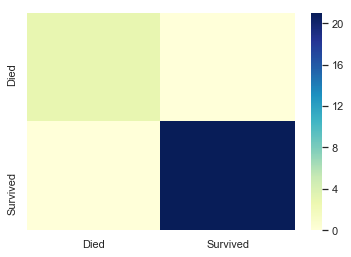

In [10]:
cm = pd.DataFrame(confusion_matrix(y_test, y_test), columns=["Died", "Survived"], index=["Died", "Survived"])
sns.heatmap(cm, cmap="YlGnBu");

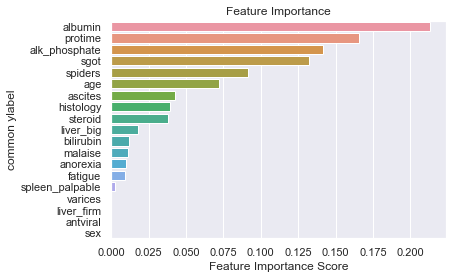

In [11]:
important_features = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
ax1 = sns.barplot(x=important_features, y=important_features.index)

ax1.set(xlabel='Feature Importance Score', ylabel='common ylabel', title = "Feature Importance");

In [12]:
estimators = np.zeros(20)
rf_score = np.zeros(20);
for i in range(0, 20):
    clf = RandomForestClassifier(n_estimators=i+1, random_state=1)
    clf.fit(X_train, y_train)
    estimators[i] = i+1
    rf_score[i] = clf.score(X_test, y_test)
error = 1 - rf_score;

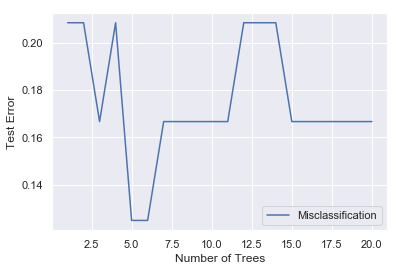

In [13]:
ax2 = sns.lineplot(x=estimators, y=error, label = "Misclassification")
ax2.set(xlabel="Number of Trees", ylabel="Test Error");

In [15]:
heptitas = heptitas.drop(["spleen_palpable", "antviral", "sex"], axis=1)
X = heptitas.drop(["class"], axis=1)
y = heptitas['class']    # target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  #70% train, 30% test
clf = RandomForestClassifier(n_estimators=4)  
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test));

Accuracy: 0.875
